In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob as gb
import cv2
from tqdm import tqdm

In [2]:
train_dir='/kaggle/input/egyptian-hieroglyphs/train'
test_dir='/kaggle/input/egyptian-hieroglyphs/test'
val_dir='/kaggle/input/egyptian-hieroglyphs/valid'

train_df=pd.read_csv('/kaggle/input/egyptian-hieroglyphs/train/_annotations.csv')
val_df=pd.read_csv('/kaggle/input/egyptian-hieroglyphs/valid/_annotations.csv')
test_df=pd.read_csv('/kaggle/input/egyptian-hieroglyphs/test/_annotations.csv')

In [3]:
#بحط كل صورة جمب اسمها و بقص الجزء المهم
new_size = 224    
X_train = []
y_train = []
#labels_df.iterrows()
for index, row in tqdm(train_df.iterrows()):
    image_file = row['filename']
    label = row['class'] 
    image_path = os.path.join(train_dir, image_file)
    orignal_image = cv2.imread(image_path)
    
    if orignal_image is not None:
        xmin = int(row['xmin'])
        ymin = int(row['ymin'])
        xmax = int(row['xmax'])
        ymax = int(row['ymax'])

        cropped_image = orignal_image[ymin:ymax, xmin:xmax]
        
        image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
        resized_image = cv2.resize(image, (new_size, new_size))
        X_train.append(resized_image)
        y_train.append(label)
    else:
        print(f"Failed to read image: {image_file}")
print("items in X_train is:       ",len(X_train) , " items") 
print("items in y_train is:       ",len(y_train) , " items") 


2723it [00:14, 190.21it/s]

items in X_train is:        2723  items
items in y_train is:        2723  items


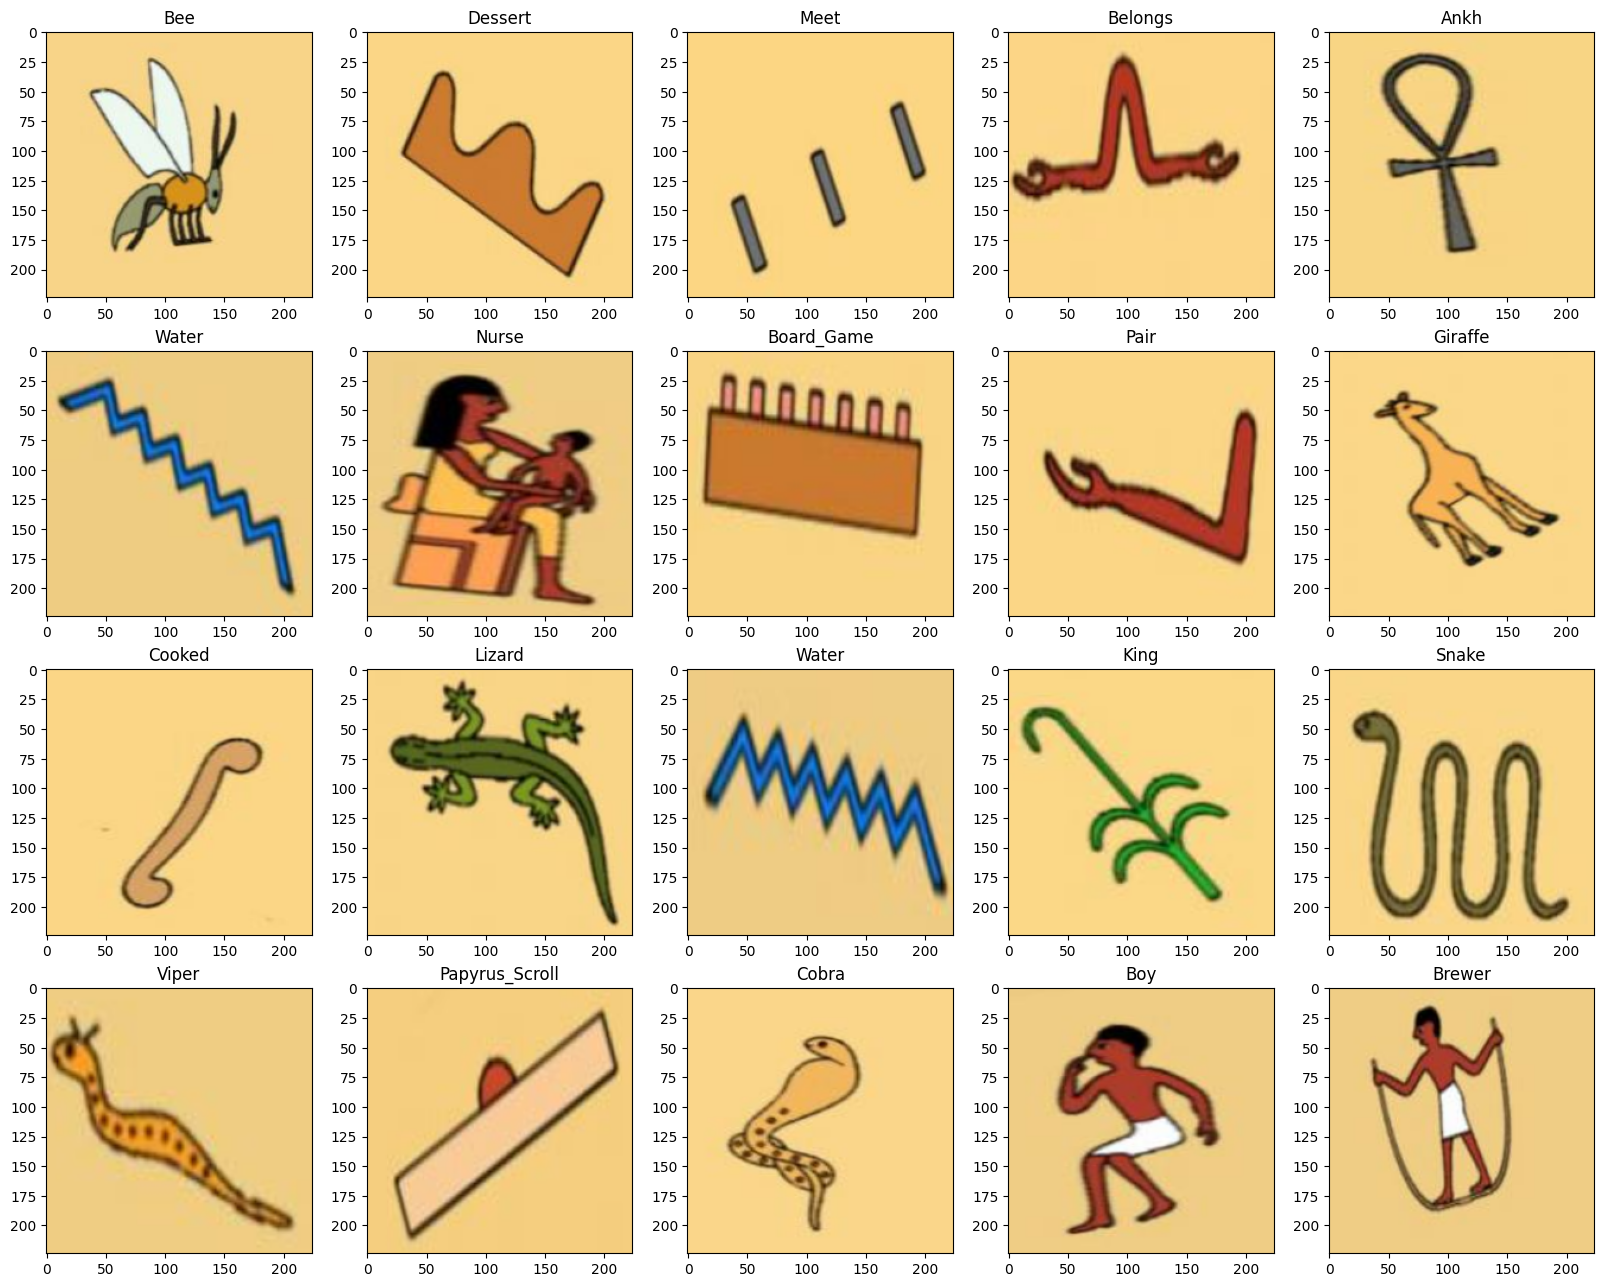

In [4]:
rand_idx=list(np.random.randint(0,len(X_train),20))
plt.figure(figsize=(20,20))
cnt=0
for i in rand_idx:
    plt.subplot(5,5,cnt+1)
    plt.imshow(X_train[i])
    plt.title(y_train[i])
    cnt+=1 

In [5]:
new_size = 224  
X_val=[]
y_val=[]
for index, row in tqdm(val_df.iterrows()):
    image_file = row['filename']
    label = row['class'] 
    image_path = os.path.join(val_dir, image_file)
    orignal_image = cv2.imread(image_path)
    
    if orignal_image is not None:
         xmin = int(row['xmin'])
         ymin = int(row['ymin'])
         xmax = int(row['xmax'])
         ymax = int(row['ymax'])

         cropped_image = orignal_image[ymin:ymax, xmin:xmax]

         image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
         resized_image = cv2.resize(image, (new_size, new_size))
         X_val.append(resized_image)
         y_val.append(label)
    else:
        print(f"Failed to read image: {image_file}")
print("items in X_val is: ",len(X_val) , " items") 
print("items in y_val is: ",len(y_val) , " items")


778it [00:03, 196.78it/s]

items in X_val is:  778  items
items in y_val is:  778  items


In [6]:
#بحط الداتا في اراي عشان اعرف اعمل الضرب عليها في النيورال
X_train = np.array(X_train)
X_train= X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 3)
y_train = np.array(y_train)
print("X_train shape  :" ,X_train.shape)
print("y_train shape :", y_train.shape)

X_train shape  : (2723, 224, 224, 3)
y_train shape : (2723,)


In [7]:
X_val = np.array(X_val)
X_val= X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 3)
y_val = np.array(y_val)
print("X_val shape  :" ,X_val.shape)
print("y_val shape :", y_val.shape)

X_val shape  : (778, 224, 224, 3)
y_val shape : (778,)


In [8]:
#بقلل the scall of photos 
for i in range(len(X_train)):
    X_train[i]=X_train[i]/255.0

In [9]:
for i in range(len(X_val)):
    X_val[i]=X_val[i]/255.0

In [10]:
#shuffle data بلغبط الداتا 
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)
X_val,y_val = shuffle(X_val,y_val)

In [12]:
#بعمل تشفير للداتا 
from sklearn.preprocessing import LabelEncoder
X_train = np.array(X_train)
y_train = np.array(y_train)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [13]:
from sklearn.preprocessing import LabelEncoder
X_val = np.array(X_val)
y_val = np.array(y_val)
label_encoder = LabelEncoder()
y_val_encoded = label_encoder.fit_transform(y_val)

In [14]:
from tensorflow import keras
import tensorflow as tf

# بعمل صندوق فاضي احط فيه الموديل بتاعي
model = keras.models.Sequential()


model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))   

# model.add(keras.layers.Conv2D(512, (3, 3), activation='relu'))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.MaxPooling2D((2, 2)))  


model.add(keras.layers.Flatten(name="Flatten1"))

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))



model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))



model.add(keras.layers.Dense(95, activation='softmax'))


optimizer = keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.summary()



/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10, 10, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten1 (Flatten)              │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,952,031 (18.89 MB)

 Trainable params: 4,948,447 (18.88 MB)

 Non-trainable params: 3,584 (14.00 KB)

In [15]:

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3) 
history = model.fit(X_train, y_train_encoded, batch_size=16, epochs=50, validation_data=(X_val,y_val_encoded), shuffle=True,callbacks=[early_stopping, reduce_lr])

Epoch 1/50


I0000 00:00:1730061122.891030     120 service.cc:145] XLA service 0x7fddbc004a10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730061122.891075     120 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  3/171 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.0000e+00 - loss: 4.9713  

I0000 00:00:1730061132.739468     120 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


171/171 ━━━━━━━━━━━━━━━━━━━━ 30s 95ms/step - accuracy: 0.0774 - loss: 4.3565 - val_accuracy: 0.0116 - val_loss: 6.5013 - learning_rate: 0.0010
Epoch 2/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.2245 - loss: 3.0571 - val_accuracy: 0.0141 - val_loss: 7.4583 - learning_rate: 0.0010
Epoch 3/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.3248 - loss: 2.5240 - val_accuracy: 0.0283 - val_loss: 4.8703 - learning_rate: 0.0010
Epoch 4/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.4219 - loss: 2.1146 - val_accuracy: 0.3702 - val_loss: 2.3878 - learning_rate: 0.0010
Epoch 5/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.4881 - loss: 1.8703 - val_accuracy: 0.3201 - val_loss: 2.6805 - learning_rate: 0.0010
Epoch 6/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.4869 - loss: 1.8073 - val_accuracy: 0.4293 - val_loss: 2.0907 - learning_rate: 0.0010
Epoch 7/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5846 - loss: 1.4562 - val

In [16]:
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

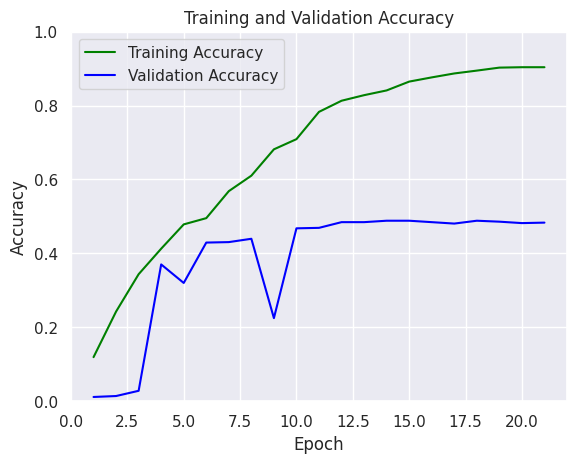

In [17]:
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim(0,1)
plt.show()

In [18]:
plt.figure()
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0,10)
plt.show()

In [19]:
model_evaluate = model.evaluate(X_val, y_val_encoded)
print("Loss     : ",model_evaluate[0])
print("Accuracy : ",model_evaluate[1])

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.4901 - loss: 1.8310
Loss     :  1.9390125274658203
Accuracy :  0.4884318709373474


In [20]:
model_evaluate = model.evaluate(X_train,y_train_encoded)
print("Loss     : ",model_evaluate[0])
print("Accuracy : ",model_evaluate[1])

86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9598 - loss: 0.2332
Loss     :  0.23277729749679565
Accuracy :  0.9588689208030701


In [22]:
#بحط كل صورة جمب اسمها و بقص الجزء المهم
new_size = 224    
X_test = []
y_test = []
#labels_df.iterrows()
for index, row in tqdm(test_df.iterrows()):
    image_file = row['filename']
    label = row['class'] 
    image_path = os.path.join(test_dir, image_file)
    orignal_image = cv2.imread(image_path)
    
    if orignal_image is not None:
        xmin = int(row['xmin'])
        ymin = int(row['ymin'])
        xmax = int(row['xmax'])
        ymax = int(row['ymax'])

        cropped_image = orignal_image[ymin:ymax, xmin:xmax]
        
        image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
        resized_image = cv2.resize(image, (new_size, new_size))
        X_test.append(resized_image)
        y_test.append(label)
    else:
        print(f"Failed to read image: {image_file}")
print("items in X_test is:       ",len(X_test) , " items") 
print("items in y_test is:       ",len(y_test) , " items") 


389it [00:02, 183.19it/s]

items in X_test is:        389  items
items in y_test is:        389  items


In [23]:
for i in range(len(X_test)):
    X_test[i]=X_test[i]/255.0
    
y_test = label_encoder.transform(y_test)

In [24]:
X_test=np.array(X_test)
X_test= X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 3)
y_test=np.array(y_test)

In [25]:
model_evaluate = model.evaluate(X_test,y_test)
print("Loss     : ",model_evaluate[0])
print("Accuracy : ",model_evaluate[1])

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.0123 - loss: 22.9850
Loss     :  23.135332107543945
Accuracy :  0.010282776318490505


In [26]:
predictions = model.predict(X_test)
y_pred = predictions.argmax(axis=-1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


In [27]:
from sklearn.metrics import classification_report
print("Classification report : \n",classification_report(y_test, y_pred))

Classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
 

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
